## KGFarm's feature transformation

In [1]:
import pandas as pd
df = pd.read_csv(r'C:\Users\niki_\Google Drive\GRAD SCHOOL\Papers\KGFarm-LFE\labor.csv')

In [2]:
import os
import pandas as pd
os.chdir('../../')

from operations.api import KGFarm
kgfarm = KGFarm()

(KGFarm is running in Human in the loop mode)
Connected to Stardog!
Access the Stardog UI at: https://cloud.stardog.com/


scanning missing values


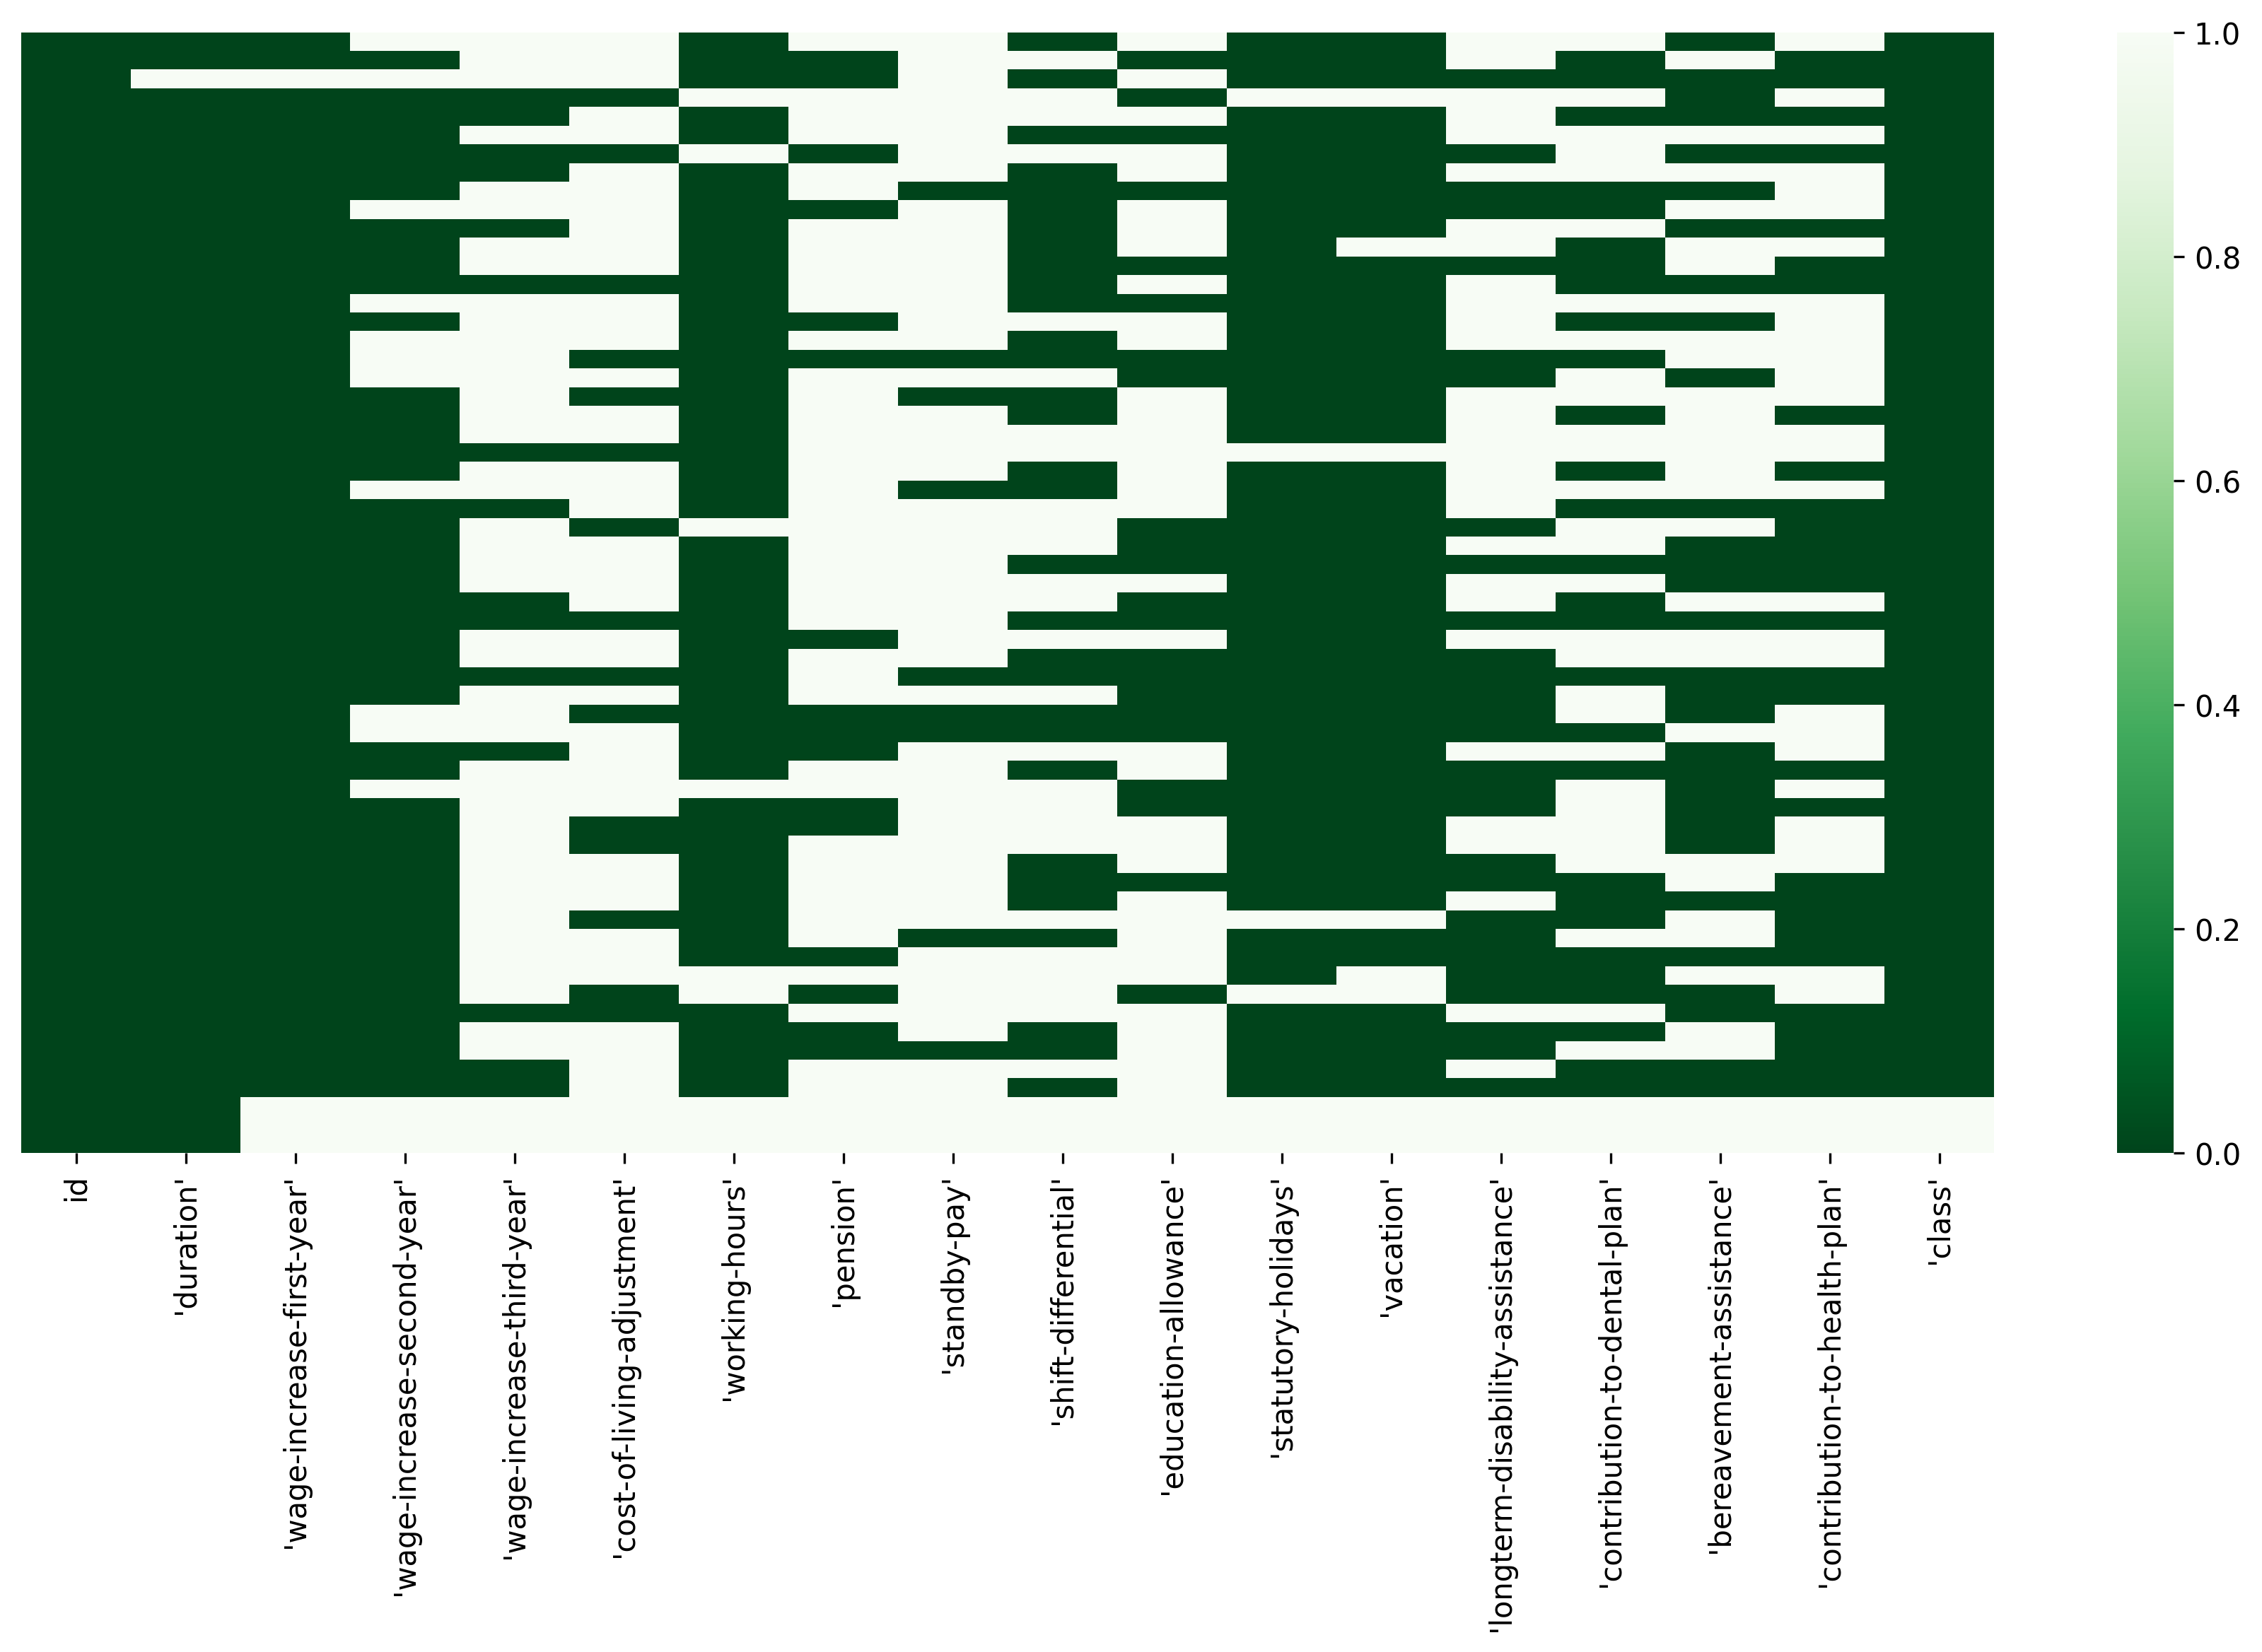

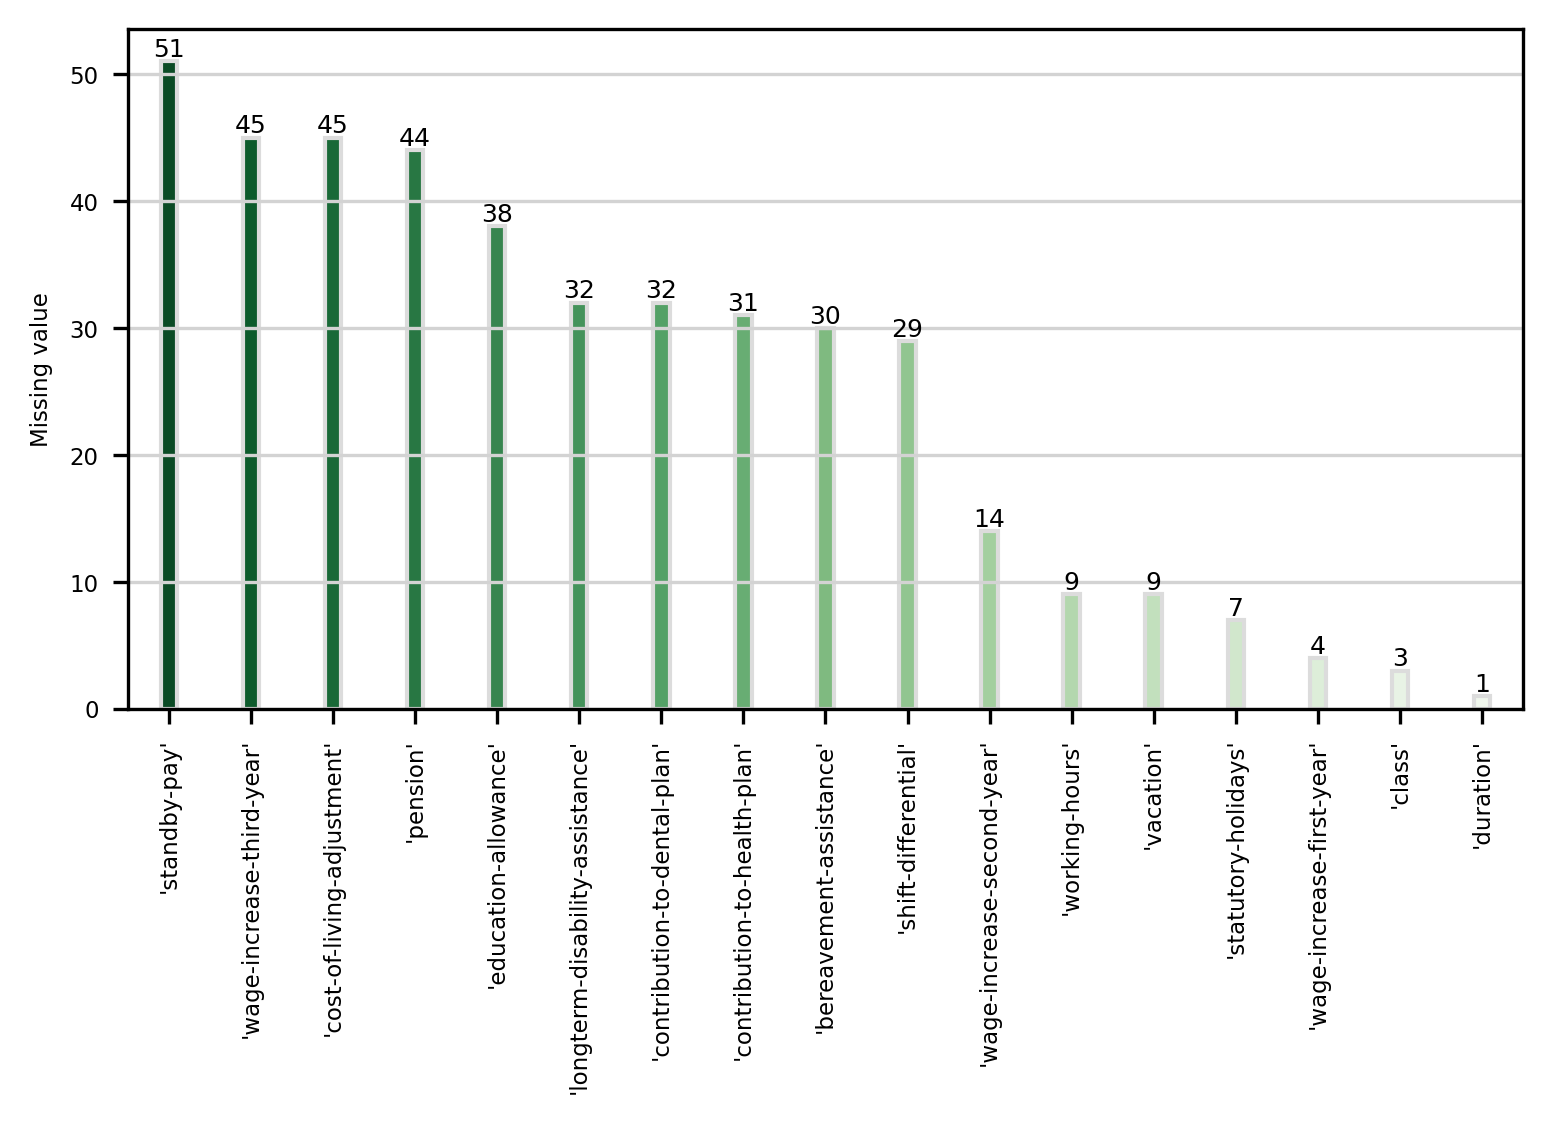

StardogException: [400] QE0PE2: com.complexible.stardog.plan.eval.ExecutionException: Encountered " <FUNCTION_NAME> "duration "" at line 19, column 29.
Was expecting one of:
    "{" ...
    "}" ...
    ";" ...
    "," ...
    "." ...
    "^^" ...
    "bind" ...
    "graph" ...
    "unnest" ...
    "minus" ...
    "filter" ...
    "values" ...
    "service" ...
    "optional" ...
    <LANGTAG> ...
    "." ...
    

In [3]:
kgfarm.recommend_cleaning_operations(df)

In [ ]:
df = kgfarm.clean(df,technique='fill')

In [ ]:
df

KGFarm exploits the abstracted link between the KGLiDS graph and Farm graph
   * <code> kgfarm.recommend_feature_transformations</code> returns all possible set of feature transformations that exists in the database.
   * <b> You can pass your existing <code>entity_df</code> to <code>kgfarm.recommend_feature_transformations(entity:pd.Dataframe)</code> to look for possible feature transformations for that very entity dataframe.

In [ ]:
transformation_info = kgfarm.recommend_feature_transformations(df)
transformation_info

In [ ]:
entity_df, transformation_model = kgfarm.apply_transformation(transformation_info.iloc[0],df)

In [ ]:
entity_df, transformation_model = kgfarm.apply_transformation(transformation_info.iloc[1],entity_df)

In [ ]:
entity_df

In [ ]:
entity_df = entity_df.rename(columns={"'class'": 'class'})
entity_df

In [ ]:
X, y = kgfarm.select_features(entity_df, dependent_variable='class',select_by='correlation')
X

In [ ]:
dependent_variable = "class"
independent_variables = [feature for feature in list(entity_df.columns) if feature != dependent_variable]

X = entity_df[independent_variables]
y = entity_df[dependent_variable]

In [ ]:
from sklearn.model_selection import cross_val_score, KFold, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rfc = RandomForestClassifier(n_estimators=1000)
lrc = LogisticRegression()

In [ ]:
k_folds = StratifiedKFold(n_splits = 10, shuffle=True)

scores = cross_val_score(rfc, X, y, cv = k_folds, scoring='f1').mean()
print(scores)
scores1 = cross_val_score(rfc, X, y, cv = k_folds, scoring='precision').mean()
print(scores1)
scores2 = cross_val_score(rfc, X, y, cv = k_folds, scoring='recall').mean()
print(scores2)
scores = cross_val_score(rfc, X, y, cv = k_folds, scoring='f1').mean()
scores